# EDA

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
import os
def readSentences(path):
    sentences = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".txt"):
                print(os.path.join(root, file))
                with open(os.path.join(root, file), "r") as input:
                    sen = input.read().replace('?','.').replace('!','.').replace('\n','.')
                    sen = sen.split(".")   #. denotes end of sentence
                sentences.extend(sen)
    return sentences
mao_sentences = readSentences("corpus/mao/original")
print(len(mao_sentences))
print(mao_sentences[0])

corpus/mao/original/ANALYSIS OF THE CLASSES IN CHINESE SOCIETY.txt
118
Who are our enemies


In [13]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

mao_df = pd.DataFrame(mao_sentences, columns = ['Sentence'])
mao_df.head()

,Sentence
0,Who are our enemies
1,Who are our friends
2,This is a question of the first importance fo...
3,The basic reason why all previous revolutiona...
4,A revolutionary party is the guide of the mas...


In [14]:
mao_df["source"] = "original"
mao_df

,Sentence,source
0,Who are our enemies,original
1,Who are our friends,original
2,This is a question of the first importance fo...,original
3,The basic reason why all previous revolutiona...,original
4,A revolutionary party is the guide of the mas...,original
...,...,...
113,"To sum up, it can be seen that our enemies are...",original
114,The leading force in our revolution is the in...,original
115,Our closest friends are the entire semi-prole...,original
116,"As for the vacillating middle bourgeoisie, th...",original


In [15]:
generated_sentences = readSentences("corpus/mao/generated")
print(len(generated_sentences))
print(generated_sentences[0])

corpus/mao/generated/generatedByLstm.txt
5
a question of the first importance for the revolution


In [16]:
generated_df = pd.DataFrame(generated_sentences, columns = ['Sentence'])
generated_df.head()

,Sentence
0,a question of the first importance for the rev...
1,The basic reason why all previous revolutiona...
2,A revolutionary party is the guide of the mas...
3,To ensure that we will definitely achieve suc...
4,


In [17]:
generated_df["source"] = "generated"
generated_df

,Sentence,source
0,a question of the first importance for the rev...,generated
1,The basic reason why all previous revolutiona...,generated
2,A revolutionary party is the guide of the mas...,generated
3,To ensure that we will definitely achieve suc...,generated
4,,generated


In [18]:
mao_df = mao_df.append(generated_df,ignore_index=True)
mao_df

,Sentence,source
0,Who are our enemies,original
1,Who are our friends,original
2,This is a question of the first importance fo...,original
3,The basic reason why all previous revolutiona...,original
4,A revolutionary party is the guide of the mas...,original
...,...,...
118,a question of the first importance for the rev...,generated
119,The basic reason why all previous revolutiona...,generated
120,A revolutionary party is the guide of the mas...,generated
121,To ensure that we will definitely achieve suc...,generated


In [19]:
mao_df['NumWords'] = mao_df['Sentence'].apply(lambda x: len(x.split()))
mao_df.head()

,Sentence,source,NumWords
0,Who are our enemies,original,4
1,Who are our friends,original,4
2,This is a question of the first importance fo...,original,11
3,The basic reason why all previous revolutiona...,original,27
4,A revolutionary party is the guide of the mas...,original,21


Let's do some cleaning operations like turning all words to lowercase, remove punctuation and non-ASCII characters which are irrelevant for modeling topics.

In [20]:
import re
NON_ALPHANUM = re.compile(r'[\W]')
NON_ASCII = re.compile(r'[^a-z0-1\s]')
def normalize_texts(texts):
    normalized_texts = ''
    lower = texts.lower()
    no_punctuation = NON_ALPHANUM.sub(r' ', lower)
    no_non_ascii = NON_ASCII.sub(r'', no_punctuation)
    return no_non_ascii
  
mao_df['Sentence2'] = mao_df['Sentence'].apply(normalize_texts)
mao_df['Sentence2'] = mao_df['Sentence2'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [21]:
mao_df.head()

,Sentence,source,NumWords,Sentence2
0,Who are our enemies,original,4,who are our enemies
1,Who are our friends,original,4,who are our friends
2,This is a question of the first importance fo...,original,11,this question the first importance for the rev...
3,The basic reason why all previous revolutiona...,original,27,the basic reason why all previous revolutionar...
4,A revolutionary party is the guide of the mas...,original,21,revolutionary party the guide the masses and r...


Remove short sentence

In [22]:
mao_df = mao_df[mao_df.NumWords>0]
short_sentence = mao_df[mao_df.NumWords<5]
short_sentence

,Sentence,source,NumWords,Sentence2
0,Who are our enemies,original,4,who are our enemies
1,Who are our friends,original,4,who are our friends
17,The middle bourgeoisie,original,3,the middle bourgeoisie
29,The petty bourgeoisie,original,3,the petty bourgeoisie
52,Another deficit,original,2,another deficit
60,The semi-proletariat,original,2,the semi proletariat
88,The proletariat,original,2,the proletariat


In [23]:
mao_df = mao_df[mao_df.NumWords>=5]
mao_df = mao_df.reset_index(drop=True)
mao_df

,Sentence,source,NumWords,Sentence2
0,This is a question of the first importance fo...,original,11,this question the first importance for the rev...
1,The basic reason why all previous revolutiona...,original,27,the basic reason why all previous revolutionar...
2,A revolutionary party is the guide of the mas...,original,21,revolutionary party the guide the masses and r...
3,To ensure that we will definitely achieve suc...,original,35,ensure that will definitely achieve success ou...
4,To distinguish real friends from real enemies...,original,32,distinguish real friends from real enemies mus...
...,...,...,...,...
100,"As for the vacillating middle bourgeoisie, th...",original,36,for the vacillating middle bourgeoisie their r...
101,a question of the first importance for the rev...,generated,9,question the first importance for the revolution
102,The basic reason why all previous revolutiona...,generated,27,the basic reason why all previous revolutionar...
103,A revolutionary party is the guide of the mas...,generated,21,revolutionary party the guide the masses and r...


# Sentence Embedding

In [24]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('stsb-roberta-large')

In [25]:
sentence_embeddings = model.encode(mao_df.Sentence2)
sentence_embeddings.shape

(105, 1024)

# Kmeans

Try to find the best k, let us use `Silhouette Coefficient`

Silhouette Coefficient    
https://en.wikipedia.org/wiki/Silhouette_(clustering)   

-1<=Si<=1   
The clusting performance is better when the Silhouette Coefficient is close to 1

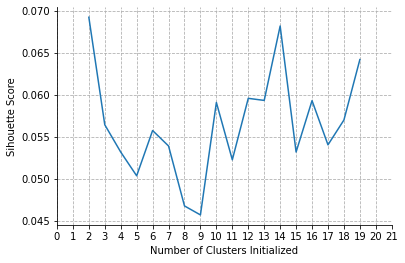

In [26]:
from sklearn import metrics
from sklearn.cluster import KMeans

scores = []
for k in range(2,20):
    labels = KMeans(n_clusters=k).fit(sentence_embeddings).labels_
    score = metrics.silhouette_score(sentence_embeddings, labels)
    scores.append(score)

plt.plot(list(range(2,20)),scores)
plt.xticks(range(0,22,1)) 
plt.grid(linestyle='--')
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")
sns.despine()

## 6 cluster Kmeans

In [27]:
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=6, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(sentence_embeddings)
cluster_df = pd.DataFrame({'sentence2':mao_df.Sentence2,'source': mao_df.source,'topic_cluster': y_km })

In [28]:
cluster_df

,sentence2,source,topic_cluster
0,this question the first importance for the rev...,original,4
1,the basic reason why all previous revolutionar...,original,2
2,revolutionary party the guide the masses and r...,original,2
3,ensure that will definitely achieve success ou...,original,2
4,distinguish real friends from real enemies mus...,original,1
...,...,...,...
100,for the vacillating middle bourgeoisie their r...,original,1
101,question the first importance for the revolution,generated,4
102,the basic reason why all previous revolutionar...,generated,2
103,revolutionary party the guide the masses and r...,generated,2


In [29]:
cluster_df.loc[cluster_df['topic_cluster'] == 0].head()

,sentence2,source,topic_cluster
26,the first section consists those who have some...,original,0
32,the second section consists those who the main...,original,0
35,they feel they cannot earn enough live just pu...,original,0
36,make both ends meet they have work longer hour...,original,0
54,the semi owner peasants are worse off than the...,original,0


In [30]:
cluster_df.loc[cluster_df['topic_cluster'] == 1].head()

,sentence2,source,topic_cluster
4,distinguish real friends from real enemies mus...,original,1
7,economically backward and semi colonial china ...,original,1
8,these classes represent the most backward and ...,original,1
9,their existence utterly incompatible with the ...,original,1
17,against interpreting the kuomintang principle ...,original,1


In [31]:
cluster_df.loc[cluster_df['topic_cluster'] == 2].head()

,sentence2,source,topic_cluster
1,the basic reason why all previous revolutionar...,original,2
2,revolutionary party the guide the masses and r...,original,2
3,ensure that will definitely achieve success ou...,original,2
13,the middle bourgeoisie which meant chiefly the...,original,2
15,self styled true disciple tai chi tao wrote th...,original,2


In [32]:
cluster_df.loc[cluster_df['topic_cluster'] == 3].head()

,sentence2,source,topic_cluster
6,the landlord class and the comprador class,original,3
10,the big landlord and big comprador classes par...,original,3
11,their political representatives are the tatist...,original,3
14,politically they stand for the establishment s...,original,3
21,therefore the idea cherished china middle bour...,original,3


In [33]:
cluster_df.loc[cluster_df['topic_cluster'] == 4].head()

,sentence2,source,topic_cluster
0,this question the first importance for the rev...,original,4
5,what the condition each the classes chinese so...,original,4
12,this class represents the capitalist relations...,original,4
16,these words depict the dilemma and anxiety thi...,original,4
19,each has hoisted huge banner one the red banne...,original,4


In [34]:
cluster_df.loc[cluster_df['topic_cluster'] == 5].head()

,sentence2,source,topic_cluster
22,included this category are the owner peasants ...,original,5
24,the owner peasants and the master handicraftsm...,original,5
41,many this section who originally belonged bett...,original,5
48,can see from the experience the may 0th moveme...,original,5
49,what here called the semi proletariat consists...,original,5


In [36]:
centers = km.cluster_centers_
centers

array([[-0.3939128 ,  0.893451  , -0.11567076, ...,  0.44335258,
        -0.31773496, -0.46302038],
       [-0.4107834 ,  1.0534973 ,  0.1507465 , ...,  0.17193446,
        -0.8896694 ,  0.38475296],
       [ 0.11309437,  1.0105208 ,  0.1718247 , ...,  0.82673985,
        -0.76593053,  0.85761756],
       [-0.30220804,  0.730815  , -0.08379164, ..., -0.24545503,
        -0.985092  , -0.05511746],
       [ 0.02371818,  0.5586251 ,  0.16066164, ...,  0.40956616,
        -1.1048081 ,  0.30005953],
       [-0.38890186,  0.91148883, -0.18254144, ...,  1.0048051 ,
        -1.2417094 ,  0.31843004]], dtype=float32)

Select a sentence which is cloest to each group center

In [38]:
def select_center_sentence(group_id):
    distance =[]
    # get one group sentence embeddings
    group_sentence_embeddings = sentence_embeddings[cluster_df['topic_cluster'] == group_id]
    print('there are %d sentences in group %d'%(len(group_sentence_embeddings),group_id))
    for sentence in group_sentence_embeddings:
        dis = 0
        for index in range(len(sentence)):
            # calculate the distance between this sentence and group center
            dis = dis + (sentence[index] - centers[group_id][index])**2
        distance.append(dis)
    
    # get the min distance's index
    min_index = distance.index(min(distance))
    df_group = cluster_df.loc[cluster_df['topic_cluster'] == group_id]
    df_group = df_group.reset_index(drop=True)
    return df_group.sentence2[min_index],df_group.source[min_index]

In [39]:
group0_belief,author = select_center_sentence(group_id = 0)
group0_belief,author

there are 18 sentences in group 0


('the semi owner peasants are worse off than the owner peasants because every year they are short about half the food they need and have make this deficit renting land from others selling part their labour power engaging petty trading',
 'original')

In [40]:
group1_belief,author = select_center_sentence(group_id = 1)
group1_belief,author

there are 24 sentences in group 1


('they are quite different from the people the first section they also want get rich but marshal chao never lets them',
 'original')

In [41]:
group2_belief,author = select_center_sentence(group_id = 2)
group2_belief,author

there are 20 sentences in group 2


('the basic reason why all previous revolutionary struggles china achieved little was their failure unite with real friends order attack real enemies',
 'original')

In [42]:
group3_belief,author = select_center_sentence(group_id = 3)
group3_belief,author

there are 5 sentences in group 3


('the big landlord and big comprador classes particular always side with imperialism and constitute extreme counterrevolutionary group',
 'original')

In [43]:
group4_belief,author = select_center_sentence(group_id = 4)
group4_belief,author

there are 20 sentences in group 4


('the leading force our revolution the industrial proletariat', 'original')

In [44]:
group5_belief,author = select_center_sentence(group_id = 5)
group5_belief,author

there are 18 sentences in group 5


('the overwhelming majority the semi owner peasants together with the poor peasants constitute very large part the rural masses',
 'original')

# Filter meaningless sentences

In [47]:
from gensim.parsing.preprocessing import remove_stopwords
from nltk import word_tokenize 
from nltk.util import ngrams
from collections import Counter

In [48]:
def bigram_based_filter(group_id):
    group = cluster_df.loc[cluster_df['topic_cluster'] == group_id]
    group['sentence3'] = group['sentence2'].apply(lambda x: remove_stopwords(x))
    words = []
    
    #get word list
    for sentence in group.sentence3:
        for word in sentence.split():
            words.append(word)
            
    # get 10% most common bigrams
    ngram_counts = Counter(ngrams(words, 2))
    bigrams = ngram_counts.most_common((int) (len(words)/10))
    
    # convert bigrams into a string and store in a list
    strings = []
    for bigram in bigrams:
        strings.append(bigram[0][0] + ' ' + bigram[0][1])
        
    group = group.reset_index(drop=True)
    group_filter = pd.DataFrame(columns = ['sentence2','source','topic_cluster','sentence3'])
    
    # remove sentences which don't contains the most common bigrams
    for index, row in group.iterrows():
        for bigram in strings:
            if bigram in row.sentence3:
                group_filter = group_filter.append(group.iloc[index,:])
                break
    
    group_filter = group_filter.reset_index(drop=True)
    
    distance =[]
    # get one group sentence embeddings
    group_sentence_embeddings = model.encode(group_filter.sentence3)

    for sentence in group_sentence_embeddings:
        dis = 0
        for index in range(len(sentence)):
            # calculate the distance between this sentence and group center
            dis = dis + (sentence[index] - centers[group_id][index])**2
        distance.append(dis)
    
    # get the min distance's index
    min_index = distance.index(min(distance))
    return group_filter.sentence2[min_index],group_filter.source[min_index]

In [49]:
bigram_based_filter(0)

('the semi owner peasants are worse off than the owner peasants because every year they are short about half the food they need and have make this deficit renting land from others selling part their labour power engaging petty trading',
 'original')

In [50]:
bigram_based_filter(1)

('since they are quite close the middle bourgeoisie economic status they have lot faith its propaganda and are suspicious the revolution',
 'original')

In [51]:
bigram_based_filter(2)

('the basic reason why all previous revolutionary struggles china achieved little was their failure unite with real friends order attack real enemies',
 'original')

In [52]:
bigram_based_filter(3)

('the big landlord and big comprador classes particular always side with imperialism and constitute extreme counterrevolutionary group',
 'original')

In [53]:
bigram_based_filter(4)

('the leading force our revolution the industrial proletariat', 'original')

In [54]:
bigram_based_filter(5)

('the overwhelming majority the semi owner peasants together with the poor peasants constitute very large part the rural masses',
 'original')

Since 3 generated sentence are in cluster 2, let's look at cluster 2

# Cluster 2

In [58]:
def bigram_based_filter(group_id):
    group = cluster_df.loc[cluster_df['topic_cluster'] == group_id]
    group['sentence3'] = group['sentence2'].apply(lambda x: remove_stopwords(x))
    words = []
    
    #get word list
    for sentence in group.sentence3:
        for word in sentence.split():
            words.append(word)
            
    # get 10% most common bigrams
    ngram_counts = Counter(ngrams(words, 2))
    bigrams = ngram_counts.most_common((int) (len(words)/10))
    
    # convert bigrams into a string and store in a list
    strings = []
    for bigram in bigrams:
        strings.append(bigram[0][0] + ' ' + bigram[0][1])
        
    group = group.reset_index(drop=True)
    group_filter = pd.DataFrame(columns = ['sentence2','source','topic_cluster','sentence3'])
    
    # remove sentences which don't contains the most common bigrams
    for index, row in group.iterrows():
        for bigram in strings:
            if bigram in row.sentence3:
                group_filter = group_filter.append(group.iloc[index,:])
                break
    
    group_filter = group_filter.reset_index(drop=True)
    
    distance =[]
    # get one group sentence embeddings
    group_sentence_embeddings = model.encode(group_filter.sentence3)

    for sentence in group_sentence_embeddings:
        dis = 0
        for index in range(len(sentence)):
            # calculate the distance between this sentence and group center
            dis = dis + (sentence[index] - centers[group_id][index])**2
        distance.append(dis)
    
    group_filter["distance"] = distance
    
    # get the min distance's index
    min_index = distance.index(min(distance))
    return group_filter,group_filter.sentence2[min_index],group_filter.source[min_index]

In [59]:
group2_df,center_sentence,source = bigram_based_filter(2)

In [60]:
group2_df

,sentence2,source,topic_cluster,sentence3,distance
0,the basic reason why all previous revolutionar...,original,2,basic reason previous revolutionary struggles ...,305.257275
1,revolutionary party the guide the masses and r...,original,2,revolutionary party guide masses revolution su...,700.596279
2,ensure that will definitely achieve success ou...,original,2,ensure definitely achieve success revolution l...,449.201461
3,the basic reason why all previous revolutionar...,generated,2,basic reason previous revolutionary struggles ...,305.257275
4,revolutionary party the guide the masses and r...,generated,2,revolutionary party guide masses revolution su...,700.596279
5,ensure that will definitely achieve success ou...,generated,2,ensure definitely achieve success revolution l...,618.381374


In [61]:
center_sentence,source

('the basic reason why all previous revolutionary struggles china achieved little was their failure unite with real friends order attack real enemies',
 'original')